In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
import math
import scipy

# **Project One**

In [ ]:
crimes = pd.read_csv("Index_Crimes_by_County_and_Agency__Beginning_1990.csv")
hateCrimes = pd.read_csv("Hate_Crimes_by_County_and_Bias_Type__Beginning_2010.csv")


 **The main dataset we're working on is the crimes dataset, it is a dataset about crimes that were reported in New-York state, a state in the US, from 1990 to 2020, which county in the state they occured in, and what agency were they reported to.**
 
 **Since New-York city, a city in New-York state, is very important, a column in the dataset specifies whether the county is in New-York city or not.**
 
 **The hate crimes dataset is about hate crimes that occured in the same counties in New-York state, who they were against, and if they were against a person or their property. It is just complementary data that we might use in answering some questions and reaching certain conclusions, it is mostly cleaned and ready to go**

In [4]:
# we're going to start cleaning the "Crimes" dataset first
# changing the name of some columns to be more descriptive
crimes.rename(
    columns={
        "Index Total": "Total Reported Crimes",
        "Violent Total": "Total Violent Crimes",
        "Property Total": "Total Property Crimes",
    },
    inplace=True,
)


In [5]:
# checking nulls
crimes.isnull().sum()


County                      0
Agency                      0
Year                        0
Months Reported          9493
Total Reported Crimes     384
Total Violent Crimes      384
Murder                    384
Rape                      384
Robbery                   384
Aggravated Assault        384
Total Property Crimes     384
Burglary                  384
Larceny                   384
Motor Vehicle Theft       384
Region                      0
dtype: int64

In [6]:
# dropping the "Months Reported" column. It has many null values and is not really relevant to the data we want to extract
crimes.drop(["Months Reported"], axis=1, inplace=True)
crimes


,County,Agency,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2020,"3,547",875,18,61,164,632,"2,672",430,"1,958",284,Non-New York City
1,Albany,Albany County Park PD,2020,2,0,0,0,0,0,2,0,2,0,Non-New York City
2,Albany,Albany County Sheriff,2020,127,12,0,4,0,8,115,11,96,8,Non-New York City
3,Albany,Albany County State Police,2020,103,26,0,18,2,6,77,4,71,2,Non-New York City
4,Albany,Altamont Vg PD,2020,6,2,0,0,0,2,4,0,4,0,Non-New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,Yates,County Total,1990,507,34,0,5,0,29,473,104,361,8,Non-New York City
21224,Yates,Penn Yan Vg PD,1990,142,3,0,1,0,2,139,11,123,5,Non-New York City
21225,Yates,Yates County Park PD,1990,1,0,0,0,0,0,1,0,1,0,Non-New York City
21226,Yates,Yates County Sheriff,1990,318,29,0,4,0,25,289,84,202,3,Non-New York City


In [7]:
# dropping all rows with nulls as they are insignificant in relation to the data
crimes.dropna(axis=0, inplace=True)
crimes.isnull().sum()


County                   0
Agency                   0
Year                     0
Total Reported Crimes    0
Total Violent Crimes     0
Murder                   0
Rape                     0
Robbery                  0
Aggravated Assault       0
Total Property Crimes    0
Burglary                 0
Larceny                  0
Motor Vehicle Theft      0
Region                   0
dtype: int64

In [8]:
# converting the region column to numerical values
crimes = pd.get_dummies(crimes, columns=["Region"])
crimes


,County,Agency,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
0,Albany,Albany City PD,2020,"3,547",875,18,61,164,632,"2,672",430,"1,958",284,0,1
1,Albany,Albany County Park PD,2020,2,0,0,0,0,0,2,0,2,0,0,1
2,Albany,Albany County Sheriff,2020,127,12,0,4,0,8,115,11,96,8,0,1
3,Albany,Albany County State Police,2020,103,26,0,18,2,6,77,4,71,2,0,1
4,Albany,Altamont Vg PD,2020,6,2,0,0,0,2,4,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,Yates,County Total,1990,507,34,0,5,0,29,473,104,361,8,0,1
21224,Yates,Penn Yan Vg PD,1990,142,3,0,1,0,2,139,11,123,5,0,1
21225,Yates,Yates County Park PD,1990,1,0,0,0,0,0,1,0,1,0,0,1
21226,Yates,Yates County Sheriff,1990,318,29,0,4,0,25,289,84,202,3,0,1


In [9]:
# we want to change the datatype of all columns to int except the County and Agency columns, to make it easier to process and
# operate on all the data, so we are dropping them, changing the datatype of the whole datafram, then adding them again

# because some values have ',' in it so it cant be converted to int
crimes.replace(",", "", regex=True, inplace=True)

# we made a temp var with all columns except Count and Agency and converted them to int
crimes_int_values_transformed = crimes.loc[
    :, (crimes.columns != "County") & (crimes.columns != "Agency")
].astype("int")

# then we changed those same columns to the new int values
crimes.loc[
    :, (crimes.columns != "County") & (crimes.columns != "Agency")
] = crimes_int_values_transformed
crimes.dtypes


County                      object
Agency                      object
Year                         int32
Total Reported Crimes        int32
Total Violent Crimes         int32
Murder                       int32
Rape                         int32
Robbery                      int32
Aggravated Assault           int32
Total Property Crimes        int32
Burglary                     int32
Larceny                      int32
Motor Vehicle Theft          int32
Region_New York City         int32
Region_Non-New York City     int32
dtype: object

In [10]:
# making another dataframe that only includes the total crimes reported in each county each year to make it easier to aggregate
totalCrimes = crimes[crimes["Agency"] == "County Total"]

# we dropped the Agency column since we dont need it anymore
totalCrimes = totalCrimes.drop("Agency", axis=1)


In [11]:
# Checking for empty columns
hateCrimes.sum()


County                                          AlbanyAlbanyBronxBronxBroomeBroomeCattaraugusC...
Year                                                                                      1356079
Crime Type                                      Crimes Against PersonsProperty CrimesCrimes Ag...
Anti-Male                                                                                       4
Anti-Female                                                                                    14
Anti-Transgender                                                                               74
Anti-Gender Non-Conforming                                                                     29
Anti-Age*                                                                                      25
Anti-White                                                                                    243
Anti-Black                                                                                   1154
Anti-American Indian

In [12]:
## dropping columns which don't have any value at all and sum up to zero
hateCrimes = hateCrimes.drop(
    columns=[
        "Anti-Native Hawaiian/Pacific Islander",
        "Anti-Other Race",
        "Anti-Atheism/Agnosticism",
        "Anti-Sikh",
        "Anti-Non-Hispanic*",
    ]
)



In [13]:
# In the Hate Crimes dataset, converting the "crime type" column to numerical values
hateCrimes = pd.get_dummies(hateCrimes, columns=["Crime Type"])



**We will not handle duplicate values and outliers because it it logical to have such values in out datasets, as this is real crime data and there might be duplicate rates in different years or counties, or there might be some countries with significantlly higher or lower rates. 
The data is very unlikely to be inaccurate because it is directly from the New-York 
state government.**

# Aggregation

In [14]:
## counting the total number of crimes that were reported in the last 30 years in the whole New-York state (all counties)
totalCrimes["Total Reported Crimes"].sum()



18192492

In [15]:
## calculating the mean of all crimes reported per year in the whole state
totalCrimes.groupby("Year")["Total Reported Crimes"].mean()



Year
1990    18349.822581
1991    18169.403226
1992    17073.967742
1993    16299.629032
1994    14825.967742
1995    13347.806452
1996    12115.532258
1997    11441.080645
1998    10469.709677
1999     9726.338710
2000     9438.274194
2001     8991.693548
2002     8692.096774
2003     8372.193548
2004     8074.838710
2005     7893.532258
2006     7707.532258
2007     7435.403226
2008     7495.016129
2009     7257.564516
2010     7265.032258
2011     7240.548387
2012     7296.145161
2013     6978.951613
2014     6615.790323
2015     6313.661290
2016     6096.564516
2017     5857.064516
2018     5630.225806
2019     5432.467742
2020     5523.435484
Name: Total Reported Crimes, dtype: float64

In [16]:
## counting total offendors of hate crimes in the last 10 years
hateCrimes["Total Offenders"].sum()



7340

In [17]:
## counting total victims of hate crimes in the last 10 years
hateCrimes["Total Victims"].sum()



6679

In [18]:
## counting the total of hate crimes in the last 10 years
hateCrimes["Total Incidents"].sum()



6469

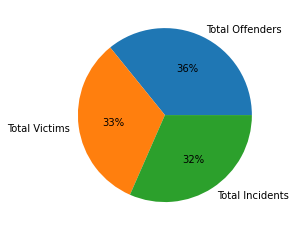

In [19]:
# visualizing the above cells
values = [
    hateCrimes["Total Offenders"].sum(),
    hateCrimes["Total Victims"].sum(),
    hateCrimes["Total Incidents"].sum(),
]
labels = ["Total Offenders", "Total Victims", "Total Incidents"]
plt.pie(values, labels=labels, autopct="%1.0f%%")
print()


**We can see that the total offenders are more that the total of victims, because some of these offenders
committed hate crimes against properties and not people.** <b>     
**And the total incidents is less than the offenders becuase there are crimes with more than one offender.**

Crime Against People = 3067
Crime Against Property = 3402


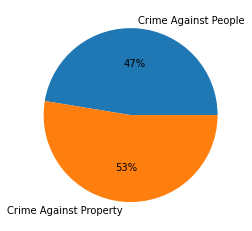

In [20]:
## counting the sum of all crimes against both people and properties in the past 10 years in the state

peopleCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Crimes Against Persons"] == 1)]
peopleCrimesSum = peopleCrimes["Total Incidents"].sum()

propertyCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Property Crimes"] == 1)]
propertyCrimesSum = propertyCrimes["Total Incidents"].sum()

values = [peopleCrimesSum, propertyCrimesSum]
labels = ["Crime Against People", "Crime Against Property"]
plt.pie(values, labels=labels, autopct="%1.0f%%")

print(f"Crime Against People = {str(peopleCrimesSum)}")
print("Crime Against Property = " + str(propertyCrimesSum))



**We can see that most hate crimes that occured in the last 10 years were against property not people.**

In [21]:
## other statistics on the total crimes dataset
totalCrimes.describe()


,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
count,1922.0000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000
mean,2005.0000,9465.396462,1719.244017,17.659729,67.274194,730.298127,904.011967,7746.152445,1438.941207,5380.853278,926.357960,0.080645,0.919355
std,8.9466,21528.043044,5413.099424,61.687798,126.022726,2816.110239,2505.164124,16535.903467,3349.195539,10526.661185,3753.210731,0.272360,0.272360
min,1990.0000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,18.000000,0.000000,0.000000,0.000000
25%,1997.0000,1013.500000,90.000000,0.000000,10.000000,6.000000,60.250000,905.000000,197.000000,653.500000,24.000000,0.000000,1.000000
50%,2005.0000,2011.000000,175.000000,2.000000,24.000000,18.000000,130.000000,1840.500000,375.000000,1410.000000,49.000000,0.000000,1.000000
75%,2013.0000,6359.500000,663.000000,7.000000,60.000000,190.250000,429.750000,5649.500000,1052.250000,4296.250000,246.750000,0.000000,1.000000
max,2020.0000,217786.000000,63087.000000,786.000000,1159.000000,36341.000000,24828.000000,173352.000000,39041.000000,122704.000000,50300.000000,1.000000,1.000000


In [22]:
## other statistics on the hate crimes dataset
hateCrimes.describe()


,Year,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2014.976226,0.005944,0.020802,0.109955,0.043091,0.037147,0.361070,1.714710,0.005944,0.193165,...,0.102526,0.001486,0.002972,0.011887,0.007429,9.612184,9.924220,10.906389,0.537890,0.462110
std,3.230624,0.076922,0.255035,0.561492,0.243213,0.419167,1.138647,2.382109,0.076922,0.824557,...,0.432885,0.038547,0.054473,0.108459,0.085937,16.838951,17.275306,19.423273,0.498933,0.498933
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,0.000000
75%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,10.000000,1.000000,1.000000
max,2020.000000,1.000000,6.000000,5.000000,3.000000,9.000000,16.000000,18.000000,1.000000,14.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,122.000000,124.000000,128.000000,1.000000,1.000000


# Anserwing Qusetions

### **1- Did the Covid-19 Pandemic affect crime rates?**

In [23]:
## checking how many crimes happened each year
totalCrimes.groupby("Year")["Total Reported Crimes"].sum()



Year
1990    1137689
1991    1126503
1992    1058586
1993    1010577
1994     919210
1995     827564
1996     751163
1997     709347
1998     649122
1999     603033
2000     585173
2001     557485
2002     538910
2003     519076
2004     500640
2005     489399
2006     477867
2007     460995
2008     464691
2009     449969
2010     450432
2011     448914
2012     452361
2013     432695
2014     410179
2015     391447
2016     377987
2017     363138
2018     349074
2019     336813
2020     342453
Name: Total Reported Crimes, dtype: int32

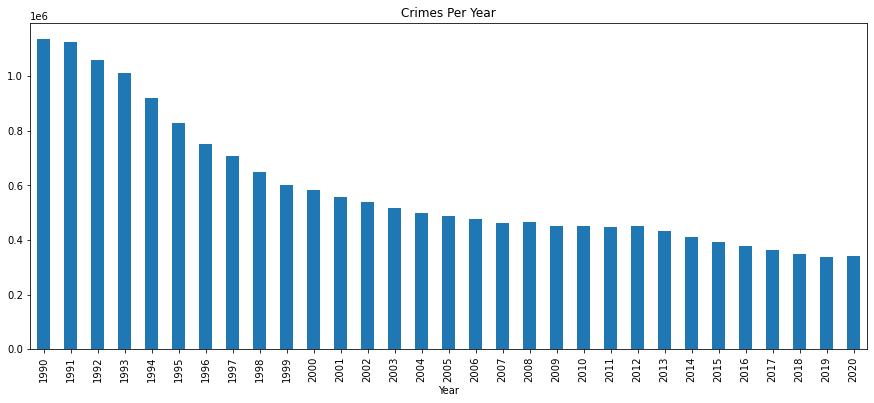

In [24]:
# visualizing it
totalCrimes.groupby("Year")["Total Reported Crimes"].sum().plot(
    kind="bar", figsize=(15, 6)
)
plt.title("Crimes Per Year")
plt.show()


**We can see that in 2020, the total of the crimes was slightly more than 2019, and somewhat close to the number of crimes in 2018. So we can infer that the Covid-19 pandemic didn't really have much of an effect on the crime rate in New-York State.**

In [25]:
## checking how many hate crimes happended per year in the last 10 years
hateCrimes.groupby("Year")["Total Incidents"].sum()



Year
2010    703
2011    556
2012    735
2013    617
2014    558
2015    503
2016    599
2017    560
2018    527
2019    623
2020    488
Name: Total Incidents, dtype: int64

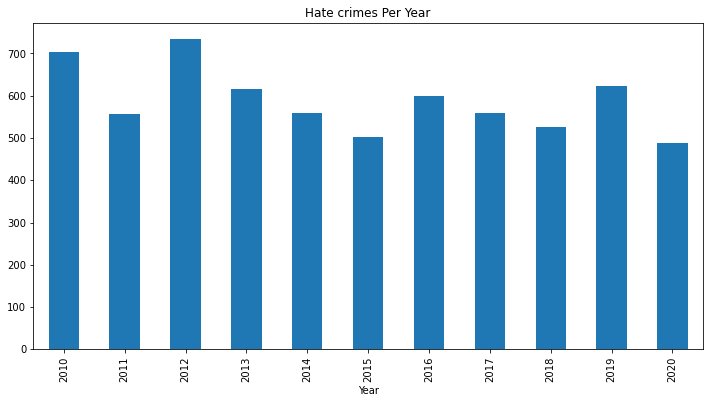

In [26]:
## visualizing it
hateCrimes.groupby("Year")["Total Incidents"].sum().plot(kind="bar", figsize=(12, 6))
plt.title("Hate crimes Per Year")
plt.show()


**However, in the hate crimes dataset, we can see that 2020 had the least hate crimes in the last 10 years. Which means that the pandemic and lockdown had some kind of effect on the rate of hate crimes in New-York State.**

### **2- What are the total crimes reported in per decade (1990s, 2000s, 2010s), and which decades had the least and most crimes?**

In [27]:
## making a copy of the totalCrimes df to cut the years into decades without changing the original df
bins = [1990, 1999, 2009, 2020]
totalCrimesDecades = totalCrimes.copy()
totalCrimesDecades["Year"] = pd.cut(
    totalCrimes["Year"], bins, labels=["1990s", "2000s", "2010s"], include_lowest=True
)
display(totalCrimesDecades)


,County,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Region_New York City,Region_Non-New York City
9,Albany,2010s,7412,1115,19,109,213,774,6297,708,5169,420,0,1
20,Allegany,2010s,401,73,3,38,3,29,328,86,214,28,0,1
26,Bronx,2010s,36217,13129,111,523,3519,8976,23088,2230,18728,2130,1,0
31,Broome,2010s,5180,660,5,126,78,451,4520,668,3634,218,0,1
41,Cattaraugus,2010s,868,125,1,37,6,81,743,137,552,54,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21148,Washington,1990s,1412,180,0,12,10,158,1232,294,892,46,0,1
21159,Wayne,1990s,2604,179,5,19,24,131,2425,543,1813,69,0,1
21175,Westchester,1990s,38145,3871,50,128,1927,1766,34274,6465,21564,6245,0,1
21216,Wyoming,1990s,1354,212,0,6,2,204,1142,406,683,53,0,1


In [28]:
# counting the total crimes in each decade
totalCrimesDecades.groupby("Year")["Total Reported Crimes"].sum()



Year
1990s    8792794
2000s    5044205
2010s    4355493
Name: Total Reported Crimes, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

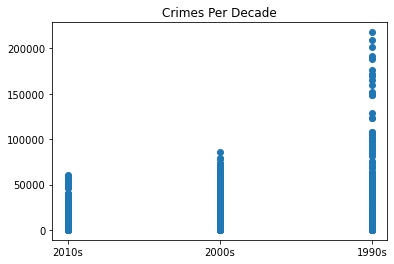

In [29]:
# visualizing it
plt.scatter(totalCrimesDecades["Year"], totalCrimesDecades["Total Reported Crimes"])
plt.title("Crimes Per Decade")
plt.show


**We can see that the 1990s had the highest crime rate in New-York State in the last three decades, and that the 2010s have the lowest crimes, which means that crime rates keep going down as time goes on.**

### **3- Which group has that most hate crimes against? and How many of these crimes were against people and how many were against their property?**

In [30]:
# Fisrt we find the group with the most hate crimes against them
allGroups = hateCrimes.iloc[:, 2:-5].sum()
print(allGroups[allGroups == allGroups.max()])

Anti-Jewish    2695
dtype: int64


<AxesSubplot:>

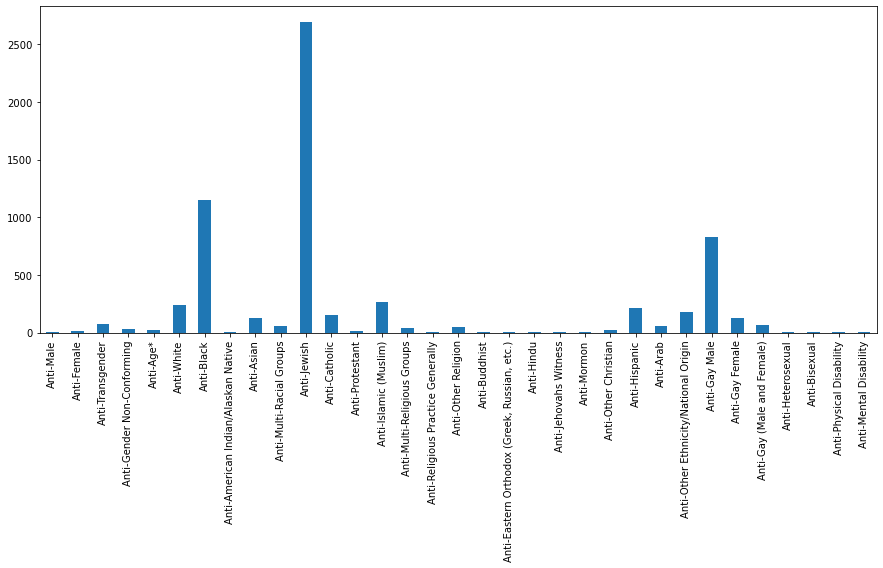

In [31]:
# visualizing it
allGroups.plot(kind="bar", figsize=(15, 6))



In [32]:
# Turns out its Anti-Jewish

# Then we find how many of the crimes against jewish poeple were against people and how many were against their property

peopleCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Crimes Against Persons"] == 1)]
peopleCrimesSum = peopleCrimes["Anti-Jewish"].sum()
propertyCrimes = hateCrimes.loc[(hateCrimes["Crime Type_Property Crimes"] == 1)]
propertyCrimesSum = propertyCrimes["Anti-Jewish"].sum()

print("Crimes against jewish people: " + str(peopleCrimesSum))
print("Crimes against jewish people's properties: " + str(propertyCrimesSum))


Crimes against jewish people: 609
Crimes against jewish people's properties: 2086


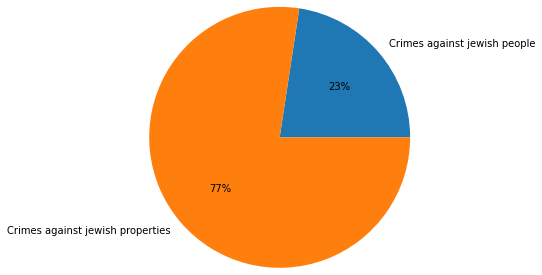

In [33]:
# visualizing it

values = [float(peopleCrimesSum), float(propertyCrimesSum)]
labels = ["Crimes against jewish people", "Crimes against jewish properties"]
plt.pie(values, labels=labels, radius=1.5, autopct="%1.0f%%")
print()


**We can clearly see that out of all the hate crimes against Jewish people, most of them were against property and not people.**

### **Questions 4, 5 and 6.**

**For the next few questions we will need to use both crimes and hate crimes dataframes so we will concat them in a new dataframe as a way of preparing the data to answer these questions**

In [34]:
# We have in hate crimes two rows for every county per year because they are split according to whether they
# are against property or against people
# so we get added them together to one to be able to concat crimes and hate crimes dataframes

# so first we get those duplicate counties and separate them to
# people and property each in diffrent variable to add them

againstProperty = hateCrimes[
    hateCrimes.duplicated(subset=["County", "Year"], keep="first")
]
againstPeople = hateCrimes[
    hateCrimes.duplicated(subset=["County", "Year"], keep="last")
]

# then we get the unique ones that have only one row by dropping all duplicate ones

uniqueCounties = hateCrimes.drop(againstProperty.index)
uniqueCounties = uniqueCounties.drop(againstPeople.index)
uniqueCounties

,County,Year,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
10,Chautauqua,2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,2,2,1,0
11,Chemung,2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
16,Delaware,2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
25,Greene,2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
26,Herkimer,2020,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,St. Lawrence,2010,0,0,0,0,0,0,1,0,...,1,0,0,0,0,2,2,2,1,0
665,Tioga,2010,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
666,Tompkins,2010,0,0,0,0,0,0,2,0,...,0,0,0,0,0,5,5,5,1,0
669,Washington,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


In [35]:
# then we add those two together to one dataframe, now there are no duplicate counties for each year
# and then we changed the index to county and year because its unique
duplicateAdded = againstProperty.set_index(
    ["County", "Year"]
) + againstPeople.set_index(["County", "Year"])

# then to make sure the concat is correct we change the index to county and year to concat unique with them
uniqueCounties.set_index(["County", "Year"], inplace=True)

# now we can do this and have a non duplicate dataframe in which every year has every county only one once
noDuplicates = pd.concat([duplicateAdded, uniqueCounties])
noDuplicates


,,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,Anti-Multi-Racial Groups,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
County,Year,,,,,,,,,,,,,,,,,,,,,
Albany,2020,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,4,4,5,1,1
Bronx,2020,0,0,1,1,0,0,2,0,2,0,...,0,0,0,0,0,22,23,25,1,1
Broome,2020,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,8,8,8,1,1
Cattaraugus,2020,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2,2,2,1,1
Cayuga,2020,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Lawrence,2010,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,2,2,2,1,0
Tioga,2010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
Tompkins,2010,0,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,5,5,5,1,0


In [36]:
# then we collet all columns that have gender hate crimes and add them in one column to get the total of
# hate crimes that are anti-gender
# get sum of those columns
Anti_Gender = noDuplicates.iloc[:, 0:4].sum(axis=1)

# concat this new column with the rest of the dataframe
anti_df = pd.concat(
    [noDuplicates.iloc[:, 0:4], Anti_Gender, noDuplicates.iloc[:, 4:]], axis=1
)

# rename it to Anti-Gender
anti_df.rename(columns={0: "Anti-Gender"}, inplace=True)
anti_df


,,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Gender,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
County,Year,,,,,,,,,,,,,,,,,,,,,
Albany,2020,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,4,4,5,1,1
Bronx,2020,0,0,1,1,2,0,0,2,0,2,...,0,0,0,0,0,22,23,25,1,1
Broome,2020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,8,8,8,1,1
Cattaraugus,2020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,2,2,1,1
Cayuga,2020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Lawrence,2010,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,2,2,2,1,0
Tioga,2010,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
Tompkins,2010,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,5,5,5,1,0


In [37]:
# now we do get the crimes dataframe ready to concat
# we set the index here too to compare with the anti one
crimes_newIndex = totalCrimes.set_index(["County", "Year"])

# now we reindex it to remove any values thats not in anti_df one
crimes_newIndex = crimes_newIndex.reindex(anti_df.index)

# then we concat the two dataframes to one final dataframe
final_df = pd.concat([crimes_newIndex, anti_df], axis=1)

# and finaly we give it normal index to make county and year return to use them
final_df.reset_index(inplace=True)
final_df


,County,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,...,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders,Crime Type_Crimes Against Persons,Crime Type_Property Crimes
0,Albany,2020,7412.0,1115.0,19.0,109.0,213.0,774.0,6297.0,708.0,...,0,0,0,0,0,4,4,5,1,1
1,Bronx,2020,36217.0,13129.0,111.0,523.0,3519.0,8976.0,23088.0,2230.0,...,0,0,0,0,0,22,23,25,1,1
2,Broome,2020,5180.0,660.0,5.0,126.0,78.0,451.0,4520.0,668.0,...,0,0,0,0,0,8,8,8,1,1
3,Cattaraugus,2020,868.0,125.0,1.0,37.0,6.0,81.0,743.0,137.0,...,0,0,0,0,0,2,2,2,1,1
4,Cayuga,2020,1207.0,199.0,2.0,63.0,16.0,118.0,1008.0,145.0,...,0,0,0,0,0,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,St. Lawrence,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,2,2,2,1,0
433,Tioga,2010,600.0,36.0,0.0,4.0,6.0,26.0,564.0,135.0,...,0,0,0,0,0,1,1,1,0,1
434,Tompkins,2010,2505.0,120.0,2.0,16.0,28.0,74.0,2385.0,313.0,...,0,0,0,0,0,5,5,5,1,0
435,Washington,2010,884.0,93.0,0.0,17.0,6.0,70.0,791.0,225.0,...,0,0,0,0,0,1,1,1,1,0


**Now that we have this new dataframe we can start answering our questions.**

### **4- Is there a correlation between rape and gender hate crimes?**

                 Rape  Anti-Gender
Rape         1.000000     0.646803
Anti-Gender  0.646803     1.000000


<AxesSubplot:>

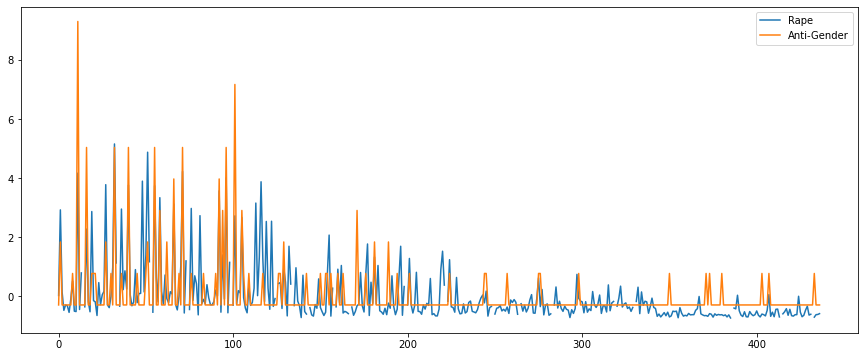

In [38]:
# we create a new dataframe with only the two columns we are intersted in
rapeAntiGender = final_df.loc[
    :, (final_df.columns == "Rape") | (final_df.columns == "Anti-Gender")
]

# and we calculate the corelation
print(rapeAntiGender.corr(method="pearson"))

# then we normalize the new dataframe
normalizedRapeAntiGender = (rapeAntiGender - rapeAntiGender.mean()) / (
    rapeAntiGender.std()
)

# after normalization we plot it and see if there are any correlation
normalizedRapeAntiGender.plot(figsize=(15, 6))



**The correlation is 0.65 which is considered moderate correlation and we can see that in our graph as well. So we can conclude that gender hate crimes and rape can have some influence on each other in some counties.**

### **5- Do the counties with the most hate crimes have higher overall crime rate?**

In [39]:
# se we start with split our table to get our desired columns which is
# total incidents of hate crimes and total reported crimes overall
totals_df = final_df.loc[
    :,
    (final_df.columns == "Total Incidents")
    | (final_df.columns == "Total Reported Crimes"),
]

# then we rename them to be more clear which column represent what
totals_df = totals_df.rename(
    columns={
        "Total Incidents": "Hate Crimes",
        "Total Reported Crimes": "Overall Crimes",
    },
)
totals_df


,Overall Crimes,Hate Crimes
0,7412.0,4
1,36217.0,22
2,5180.0,8
3,868.0,2
4,1207.0,3
...,...,...
432,NaN,2
433,600.0,1
434,2505.0,5
435,884.0,1


                Overall Crimes  Hate Crimes
Overall Crimes        1.000000     0.868791
Hate Crimes           0.868791     1.000000


<AxesSubplot:xlabel='Hate Crimes', ylabel='Overall Crimes'>

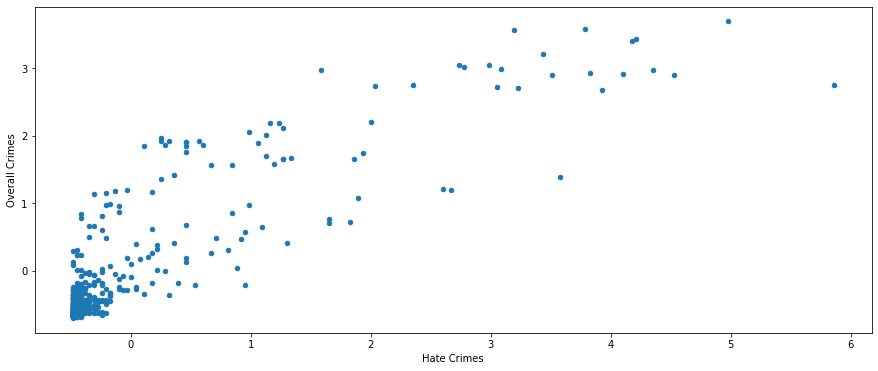

In [40]:
# then we calculate our corraelatain
print(totals_df.corr(method="pearson"))

# then we normalize it to make it easier to visualize
normalizedTotals = (totals_df - totals_df.mean()) / (totals_df.std())
normalizedTotals.plot.scatter(x="Hate Crimes", y="Overall Crimes", figsize=(15, 6))



**This time we can see clearly from the plot that the correlation time is very high, we found it to be 0.87, which is very high. From this we can conclude that Yes, hate crimes and overall crime rates affect each other in most counties.**

### **6- How does the geographical location affect hate crimes against religious groups?**

**So our dataset is divided into two types of counties based on region, counties inside New York city and others not inside the city, since its a very highly populated city, the counties inside New-York city have more people and people there are more diverse than the ones outside the city.**

In [41]:
# we collect all columns with religion in them
AntiReligion_column = final_df.iloc[:, 25:38].sum(axis=1)

# then we concat this new column and add it to the old dataframe to work with it
AntiReligion_df = pd.concat(
    [final_df.iloc[:, 0:38], AntiReligion_column, final_df.iloc[:, 38:]], axis=1
)
AntiReligion_df.rename(columns={0: "Anti-Religious Groups"}, inplace=True)

# now we separate the ones in new York and the ones not in New York
inNewYork = AntiReligion_df.loc[(AntiReligion_df["Region_New York City"] == 1)]
notNewYork = AntiReligion_df.loc[(AntiReligion_df["Region_Non-New York City"] == 1)]

# then we print the sum of crimes to see which one have more crimes
print(
    "Total Religion hate crimes outside New York = "
    + str(notNewYork["Anti-Religious Groups"].sum())
)
print(
    "Total Religion hate crimes inside of New York = "
    + str(inNewYork["Anti-Religious Groups"].sum())
)


Total Religion hate crimes outside New York = 1084
Total Religion hate crimes inside of New York = 2031


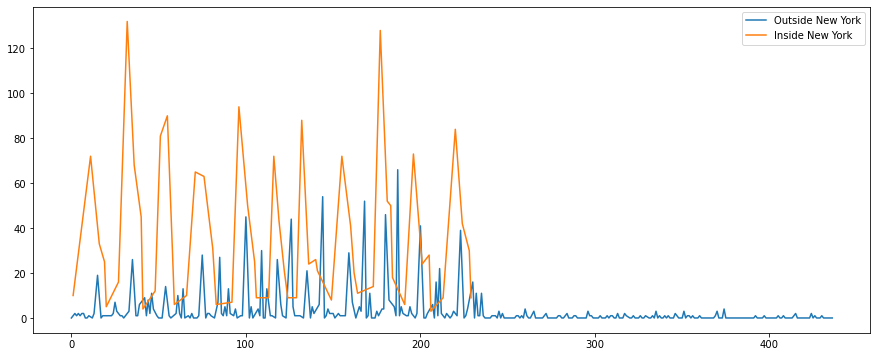

In [42]:
# as you can see its nearly twice inside of new york
# so we visualize it
notNewYork["Anti-Religious Groups"].plot(figsize=(15, 6))
inNewYork["Anti-Religious Groups"].plot(figsize=(15, 6))
plt.legend(["Outside New York", "Inside New York"])



**As we can see, the hate crimes rates against religious groups are much higher in New-York City than outside the city, even though the counties outside the city are much more. That's because it's one of the most prominent cities in the world and has high and diverse population, so naturally, crime rates are much higher.**

# **Project Two**

Now, we're going to scrape data from a website and integrate it with our data to answer more questions.

# Scraping and cleaning

In [43]:
url = "https://www.disastercenter.com/crime/nycrime.htm"
html = requests.get(url)
html_text = html.text
page = BeautifulSoup(html_text, "html.parser")

In [59]:
# finding the content we want because it nested in a lot of tbody
table = page.find("table")
temptable = table.find("tbody").find("tbody")
temptable2 = temptable.findAll("tbody")
rows = temptable2[2].findAll("tr")
rows[1]

<tr>
<td><font size="-1">Year </font></td>
<td><font size="-1">Population </font></td>
<td><font size="-1">Index </font></td>
<td><font size="-1">Violent </font></td>
<td><font size="-1">Property </font></td>
<td><font size="-1">Murder </font></td>
<td><font size="-1">Rape </font></td>
<td><font size="-1">Robbery </font></td>
<td><font size="-1">assault </font></td>
<td><font size="-1">Burglary </font></td>
<td><font size="-1">Theft </font></td>
<td><font size="-1">Theft </font></td>
</tr>

In [45]:
# since there are rows with symbols in them that make it hard to extract that values, we'll remove them like this
items = []
items = [row.findAll("td") for row in rows]
for item in items:
    for j in range(len(item)):
        item[j] = item[j].text
        item[j] = item[j].replace("\xa0", "")
        item[j] = item[j].replace("\n", "")
        item[j] = item[j].replace(",", "")
        item[j] = item[j].replace(" ", "")
items


[['',
  '',
  '',
  '',
  '',
  '',
  'Forcible',
  '',
  'Aggravated',
  '',
  'Larceny-',
  'Vehicle'],
 ['Year',
  'Population',
  'Index',
  'Violent',
  'Property',
  'Murder',
  'Rape',
  'Robbery',
  'assault',
  'Burglary',
  'Theft',
  'Theft'],
 ['1965',
  '18073000',
  '554050',
  '58802',
  '495248',
  '836',
  '2320',
  '28182',
  '27464',
  '183443',
  '253353',
  '58452'],
 ['1966',
  '18258000',
  '609465',
  '62561',
  '546904',
  '882',
  '2439',
  '30098',
  '29142',
  '196127',
  '286409',
  '64368'],
 ['1967',
  '18336000',
  '692528',
  '75124',
  '617404',
  '996',
  '2665',
  '40202',
  '31261',
  '219157',
  '314472',
  '83775'],
 ['1968',
  '18113000',
  '829453',
  '98515',
  '730938',
  '1185',
  '2527',
  '59857',
  '34946',
  '250918',
  '375143',
  '104877'],
 ['1969',
  '18321000',
  '837210',
  '105870',
  '731340',
  '1324',
  '2902',
  '64754',
  '36890',
  '248477',
  '367463',
  '115400'],
 ['',
  '',
  '',
  '',
  '',
  '',
  'Forcible',
  '',
  'A

In [46]:
# adding each column in a list

Year = []
Population = []
Index = []
Violent = []
Property = []
Murder = []
Forcible_Rape = []
Robbery = []
Aggravated_assault = []
Burglary = []
Larceny_Theft = []
Vehicle_Theft = []

for i in items:
    if i[0] in ["", "Year"]:
        continue
    Year.append(i[0])
    Population.append(i[1])
    Index.append(i[2])
    Violent.append(i[3])
    Property.append(i[4])
    Murder.append(i[5])
    Forcible_Rape.append(i[6])
    Robbery.append(i[7])
    Aggravated_assault.append(i[8])
    Burglary.append(i[9])
    Larceny_Theft.append(i[10])
    Vehicle_Theft.append(i[11])
Year


['1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [47]:
# finally, adding our data to a df

scrapped_df = pd.DataFrame(
    {
        "Year": Year,
        "Population": Population,
        "Total": Index,
        "Total Violent Crimes": Violent,
        "Murder": Murder,
        "Rape": Forcible_Rape,
        "Robbery": Robbery,
        "Aggravated Assault": Aggravated_assault,
        "Total Property Crimes": Property,
        "Burglary": Burglary,
        "Larceny": Larceny_Theft,
        "Motor Vehicle Theft": Vehicle_Theft,
    }
)
scrapped_df.head()


,Year,Population,Total,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft
0,1965,18073000,554050,58802,836,2320,28182,27464,495248,183443,253353,58452
1,1966,18258000,609465,62561,882,2439,30098,29142,546904,196127,286409,64368
2,1967,18336000,692528,75124,996,2665,40202,31261,617404,219157,314472,83775
3,1968,18113000,829453,98515,1185,2527,59857,34946,730938,250918,375143,104877
4,1969,18321000,837210,105870,1324,2902,64754,36890,731340,248477,367463,115400


In [48]:
for col in scrapped_df.columns:
    scrapped_df[col] = pd.to_numeric(scrapped_df[col])
scrapped_df.dtypes


Year                     int64
Population               int64
Total                    int64
Total Violent Crimes     int64
Murder                   int64
Rape                     int64
Robbery                  int64
Aggravated Assault       int64
Total Property Crimes    int64
Burglary                 int64
Larceny                  int64
Motor Vehicle Theft      int64
dtype: object

# Integrating

In [49]:
temp_totalCrimes = totalCrimes.drop(
    ["County", "Region_New York City", "Region_Non-New York City"], axis=1
)
temp_totalCrimes = temp_totalCrimes.groupby("Year").sum()
temp_scrapped_df = scrapped_df.drop("Population", axis=1)
temp_scrapped_df.rename(columns={"Total": "Total Reported Crimes"}, inplace=True)
temp_scrapped_df.set_index(scrapped_df.Year, inplace=True)
temp_scrapped_df.drop("Year", axis=1, inplace=True)
new_totalCrimes = pd.concat([temp_scrapped_df[temp_scrapped_df.index < 1990], temp_totalCrimes])
new_totalCrimes["Population"] = np.append(
    scrapped_df.Population.values,
    (int)(scrapped_df.Population.loc[scrapped_df["Year"] >= 2015].mean()),
)
new_totalCrimes


,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Population
Year,,,,,,,,,,,
1965,554050,58802,836,2320,28182,27464,495248,183443,253353,58452,18073000
1966,609465,62561,882,2439,30098,29142,546904,196127,286409,64368,18258000
1967,692528,75124,996,2665,40202,31261,617404,219157,314472,83775,18336000
1968,829453,98515,1185,2527,59857,34946,730938,250918,375143,104877,18113000
1969,837210,105870,1324,2902,64754,36890,731340,248477,367463,115400,18321000
1970,904314,124613,1444,2875,81149,39145,779701,267474,386553,125674,18190740
1971,935022,145048,1823,3225,97682,42318,789974,273704,388612,127658,18391000
1972,804605,138542,2026,4199,86391,45926,666063,239886,321096,105081,18366000
1973,814349,135468,2040,4852,80795,47781,678881,246246,320307,112328,18265000


# Answering remaining questions

### 7-Did the Iran-Iraq war affect crime rates in new york? 

We wanted to know if the Iran-Iraq war that happened from 1980 to 1988 had an effect on crime rates in the state.

<AxesSubplot:ylabel='Year'>

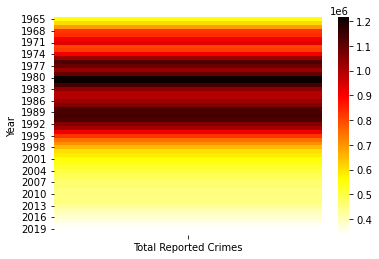

In [50]:
# mapping the overall crime rates in all years 
sns.heatmap(new_totalCrimes[["Total Reported Crimes"]],cmap = 'hot_r')

We found that crime rates in the 80s are the greater in all decades, the war had caused an unprecedented increase in crime rates, and have never been that high ever again.

###  8- How did the “me too” movement affect rape rates in the state?

The "me too" movement had a great effect on rape and sexual assault crimes all over the world, we wanted to see if it had an effect on rape crimes in new york states as well.

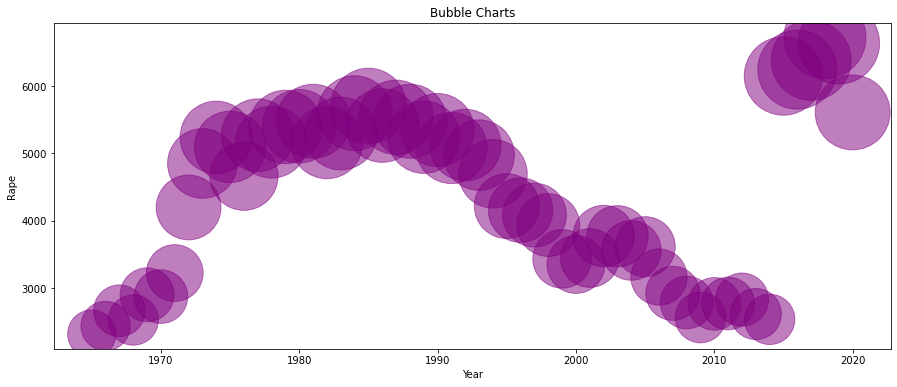

In [51]:
# visualizing rape crimes overr the years
new_totalCrimes.reset_index().plot.scatter(x = 'Year', y = 'Rape',  figsize=(15, 6), s='Rape', alpha=0.5,c='purple')

plt.title("Bubble Charts")
plt.show()

As we can see, rape crimes have been really high since 2016, this means that the movement had some effect on the crime since it started gaining attention around that time as well. It means that the movement succeeded in raising awareness and encouraging individuals to report their experiences.

# Hypothesis Testing

We want to test the hypothesis that the population in a certain year affects the overall crime rates in that year.

**H0** = The population has NO effect on crime rates. <br>
**H1** = The population has some effect on crime rates.

In [52]:
new_totalCrimes = new_totalCrimes.reset_index()
new_totalCrimes

,Year,Total Reported Crimes,Total Violent Crimes,Murder,Rape,Robbery,Aggravated Assault,Total Property Crimes,Burglary,Larceny,Motor Vehicle Theft,Population
0,1965,554050,58802,836,2320,28182,27464,495248,183443,253353,58452,18073000
1,1966,609465,62561,882,2439,30098,29142,546904,196127,286409,64368,18258000
2,1967,692528,75124,996,2665,40202,31261,617404,219157,314472,83775,18336000
3,1968,829453,98515,1185,2527,59857,34946,730938,250918,375143,104877,18113000
4,1969,837210,105870,1324,2902,64754,36890,731340,248477,367463,115400,18321000
5,1970,904314,124613,1444,2875,81149,39145,779701,267474,386553,125674,18190740
6,1971,935022,145048,1823,3225,97682,42318,789974,273704,388612,127658,18391000
7,1972,804605,138542,2026,4199,86391,45926,666063,239886,321096,105081,18366000
8,1973,814349,135468,2040,4852,80795,47781,678881,246246,320307,112328,18265000
9,1974,911703,145427,1919,5240,86814,51454,766276,271824,390357,104095,18111000


In [53]:
scipy.stats.ttest_ind(new_totalCrimes['Year'],new_totalCrimes['Population'])

Ttest_indResult(statistic=-189.8372501061812, pvalue=2.902347045316975e-140)

We reject the null hypothesis and conclude that the population does have an effect on the crime rates.